In [1]:

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
#levantamento dos cursos da UEP ofertados no site do senac PE no dia 26-4-18
CursosUepSite = pd.read_csv('levantamentoUepSite.CSV' ,delimiter=';' , encoding='ISO-8859-1')

In [70]:
#todos
CursosUepSite

,curso,Unidade,Area,Carga(h),turno,vagas,dias,preco,tipo,parcelas,local
0,"contas a pagar, receber e tesouraria",UEP,gestão,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
1,Agenda cultural,UEP,comunicação,16,tarde,20,seg a sex,640,qualificação profissional,3,sto amaro
2,Marketing e midias,UEP,Comercio,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
3,Aperfeiçoamento ilustrador,UEP,Artes,80,manha,22,ter e qui,360,Aperfeiçoamento,2,sto amaro
4,Assistente Adm,UEP,gestão,160,noite,28,seg a sex,880,qualificação profissional,3,brasilar
5,Assistente Adm,UEP,gestão,160,manha,25,seg a sex,880,qualificação profissional,3,sto amaro
6,APH e primeiros socorros,UEP,saude,40,tarde,25,seg a sex,210,Aperfeiçoamento,1,sto amaro
7,calculo folha pgt,UEP,gestão,15,noite,21,seg a sex,190,Aperfeiçoamento,1,brasilar
8,Compras e adm de materiais,UEP,gestão,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
9,Contabilidade n contatdores,UEP,gestão,15,noite,22,seg a sex,180,Aperfeiçoamento,1,espinheiro


In [47]:
#dados recolhidos
CursosUepSite.columns

Index(['curso', 'Unidade', 'Area', 'Carga(h)', 'turno', 'vagas', 'dias',
       'preço ', 'tipo', 'parcelas', 'local'],
      dtype='object')

In [8]:
#quantidade de cursos oferados com inscrições abertas
print("Quantidade de cursos Registradas: ",len(CursosUepSite))

Quantidade de cursos Registradas:  59


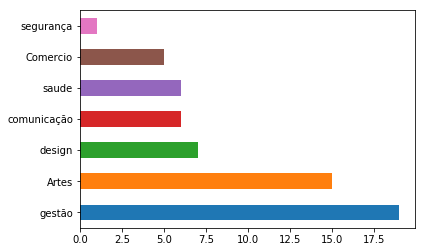

In [38]:
#separados por area
CursosUepSite['Area'].value_counts().plot(kind='barh')

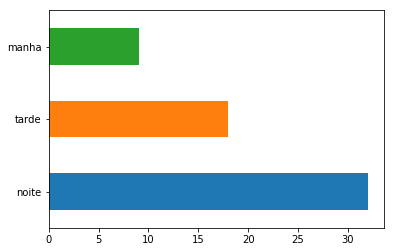

In [39]:
#separados por turno
CursosUepSite['turno'].value_counts().plot(kind='barh')

Quantidade de Vagas


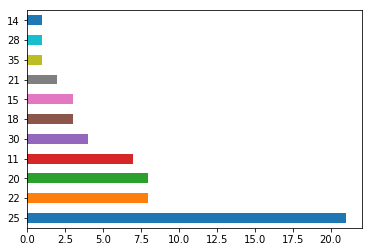

In [14]:
#separado pela quantidade de vagas por turma
CursosUepSite['vagas'].value_counts().plot(kind='barh')

Disposição por dias de aula


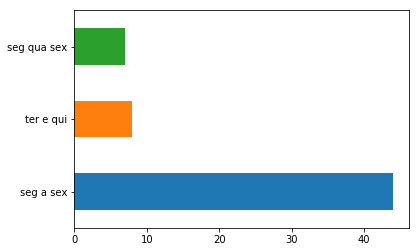

In [16]:
#separado por dias de aula
CursosUepSite['dias'].value_counts().plot(kind='barh')

Disposição por Tipo de Curso


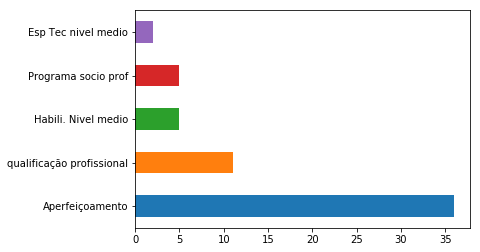

In [17]:
#separado por tipos de curso
CursosUepSite['tipo'].value_counts().plot(kind='barh')

Local


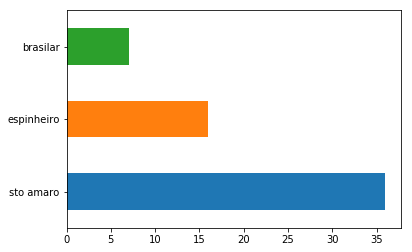

In [18]:
#separados por local
CursosUepSite['local'].value_counts().plot(kind='barh')

In [24]:
# A correlação mostra quanto uma variavel influencia a outra, vamos medir a corelação entre as colunas
# 0 = relação nenhuma
#1 = relação alta
print(CursosUepSite.corr())

Correção =quanto uma variavel influencia a outra  0 = nenhuma relação -1= relação alta negativa 1= relação alta positiva
          Carga(h)     vagas    preço   parcelas
Carga(h)  1.000000  0.439042  0.961440  0.966852
vagas     0.439042  1.000000  0.372580  0.481731
preço     0.961440  0.372580  1.000000  0.959033
parcelas  0.966852  0.481731  0.959033  1.000000


In [37]:
#filtrando as colunas carga horária e preço para analisar a relação entre elas
corelacaoPrecoCarga = CursosUepSite.drop(CursosUepSite.columns[[0,1,2,4, 5,6,8,9,10]], axis=1)
corelacaoPrecoCarga


filtrando as colunas carga e preço 


,Carga(h),preço
0,15,180
1,16,640
2,15,180
3,80,360
4,160,880
5,160,880
6,40,210
7,15,190
8,15,180
9,15,180


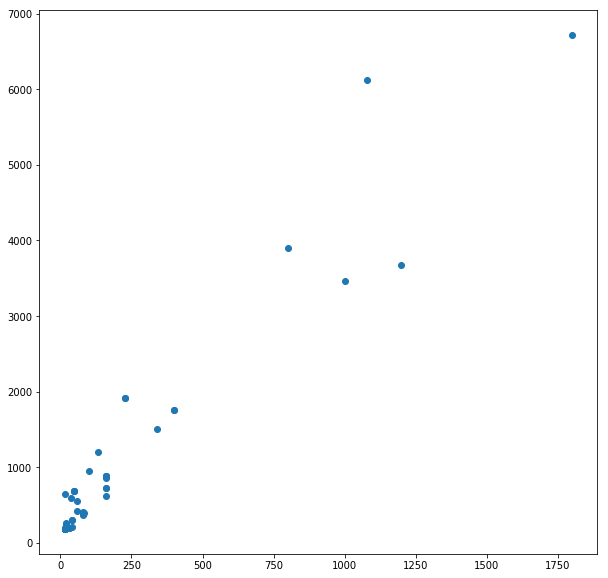

In [78]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursosUepSite['Carga(h)']
y = CursosUepSite['preco']
 
# plot grafico de dispersao
#cruzando os dados de local e carga horária
plt.scatter(x, y)

In [46]:
print("obtendo uma formula para ajudar no ajuste de preço")
print("y = preço curso")
print("x= carga horária")
from IPython.display import Image
from IPython.core.display import HTML
Image(url="cargaH_valorCurso_.jpg")

obtendo uma formula para ajudar no ajuste de preço
y = preço curso
x= carga horária


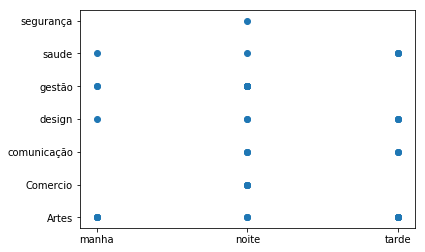

In [50]:
y = CursosUepSite['Area']
x = CursosUepSite['turno']
 
# plot grafico de dispersao
#cruzando os dados de turnos com segmento
plt.scatter(x, y)

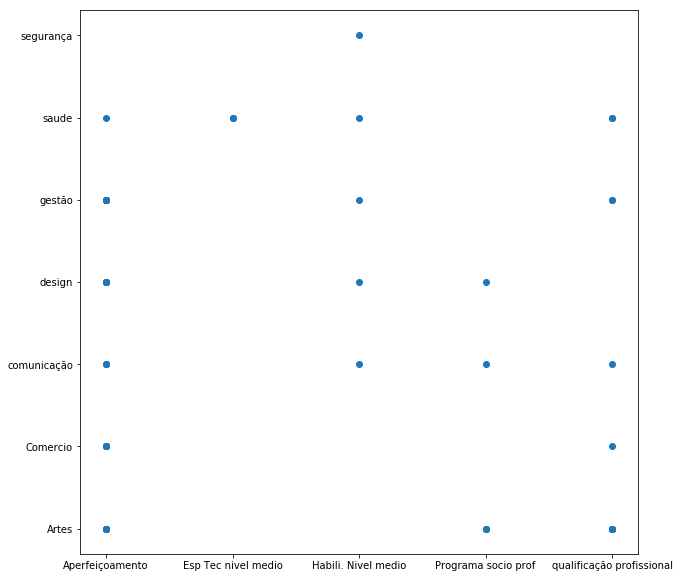

In [57]:
plt.rcParams['figure.figsize'] = (10,10)
y = CursosUepSite['Area']
x = CursosUepSite['tipo']
 
# plot grafico de dispersao
#cruzando os dados de Area  com tipos
plt.scatter(x, y)


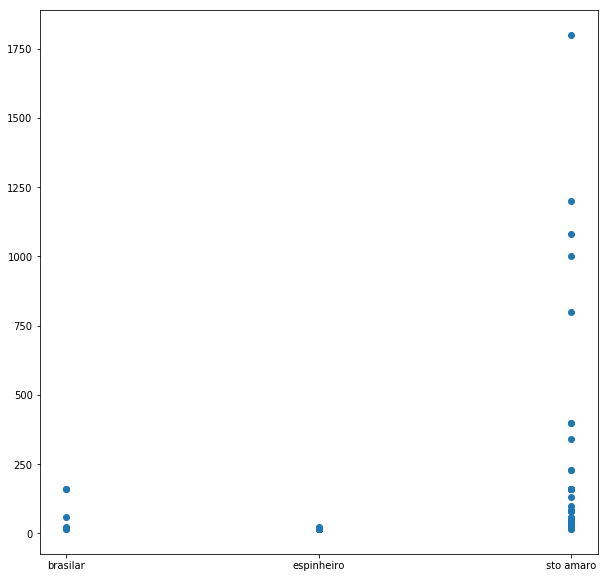

In [61]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursosUepSite['local']
y = CursosUepSite['Carga(h)']
 
# plot grafico de dispersao
#cruzando os dados de local e carga horária
plt.scatter(x, y)


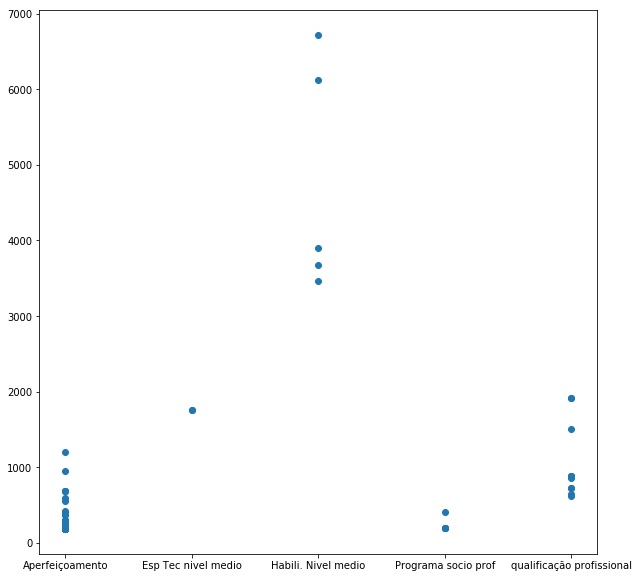

In [77]:
plt.rcParams['figure.figsize'] = (10,10)
x = CursosUepSite['tipo']
y = CursosUepSite['preco']
 
# plot grafico de dispersao
#cruzando os dados de local e carga horária
plt.scatter(x, y)

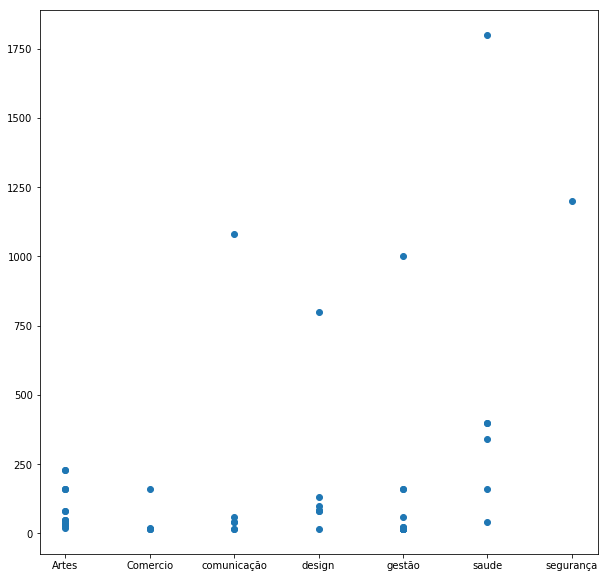

In [81]:
plt.rcParams['figure.figsize'] = (10,10)
y = CursosUepSite["Carga(h)"]
x = CursosUepSite['Area']
 
# plot grafico de dispersao
#cruzando os dados de local e carga horária
plt.scatter(x, y)

In [71]:
CursosUepSite.head()

,curso,Unidade,Area,Carga(h),turno,vagas,dias,preco,tipo,parcelas,local
0,"contas a pagar, receber e tesouraria",UEP,gestão,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
1,Agenda cultural,UEP,comunicação,16,tarde,20,seg a sex,640,qualificação profissional,3,sto amaro
2,Marketing e midias,UEP,Comercio,15,noite,25,seg a sex,180,Aperfeiçoamento,1,espinheiro
3,Aperfeiçoamento ilustrador,UEP,Artes,80,manha,22,ter e qui,360,Aperfeiçoamento,2,sto amaro
4,Assistente Adm,UEP,gestão,160,noite,28,seg a sex,880,qualificação profissional,3,brasilar
